## Health Care Cost Analysys/Prediction Python

#####  importing required libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
import warnings

In [94]:
## load the data, where data stored in the directory same as you write the python code

df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [95]:
df=df.dropna()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [96]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [97]:
df.shape

(1338, 7)

In [98]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [99]:
df['bmi_int']=df['bmi'].apply(lambda x: int(x))

In [100]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_int'],
      dtype='object')

In [101]:
variable=['age', 'sex', 'children', 'smoker', 'region', 'bmi_int']

Data distribution analysys


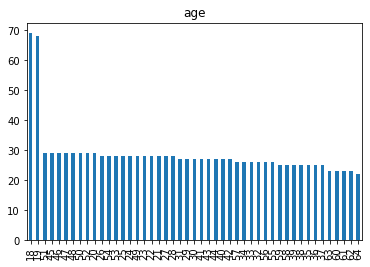

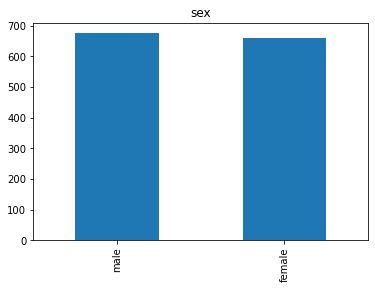

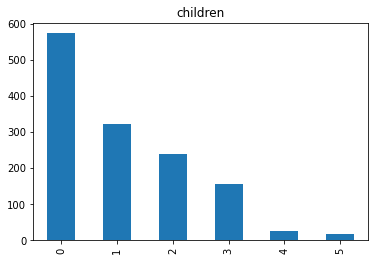

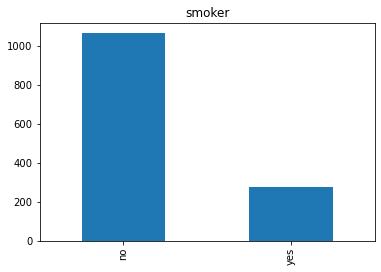

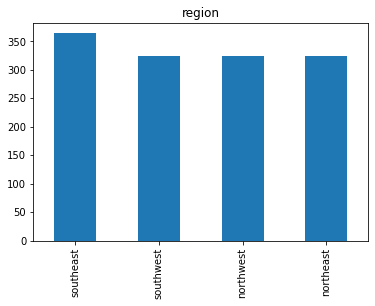

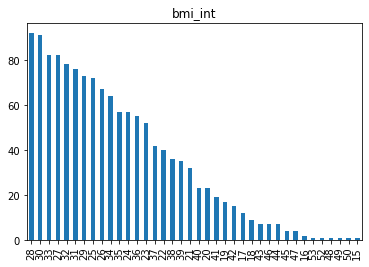

In [102]:
## data distribution analysis
print('Data distribution analysys')
for v in variable:
    df = df.sort_values(by=[v])
    df[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

Mean Cost analysis


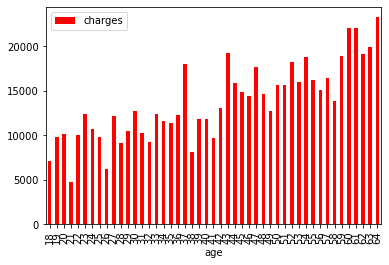

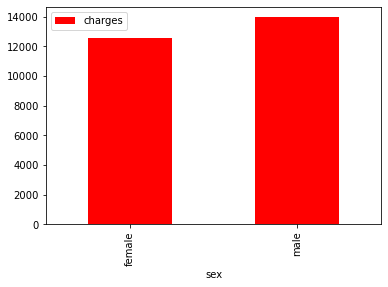

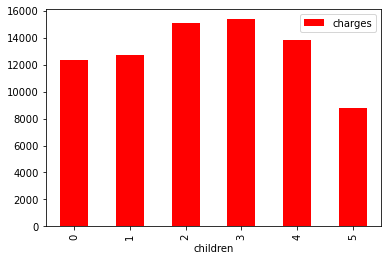

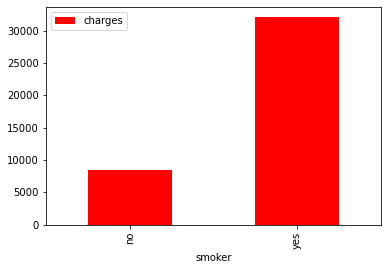

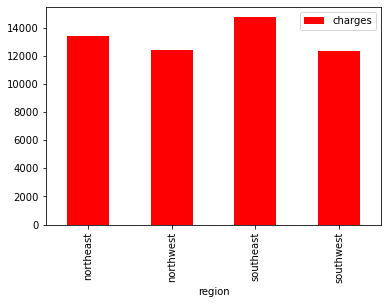

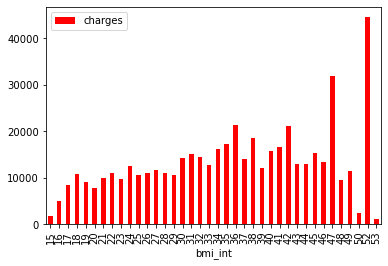

In [103]:
## average cost analysis
print('Mean Cost analysis')
for v in variable:
    group_df=df.groupby(pd.Grouper(key=v)).mean()
    group_df=group_df.sort_index()
    group_df.plot(y=['charges'], kind='bar',color='red')
    plt.show()

variables pair plot:


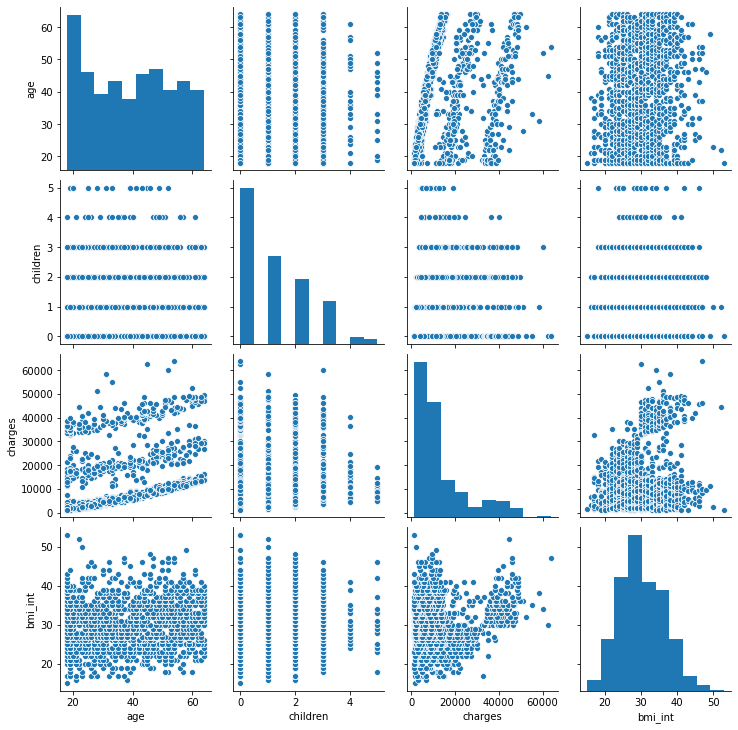

In [104]:
## variables pairplot
print('variables pair plot:')
variables=['age', 'sex', 'children', 'smoker', 'region', 'charges','bmi_int']
sns_plot=sns.pairplot(df[variables])
plt.show()           

In [105]:
print('Model training and evaluating\n\n')
#transform categorical data
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['region'] = le_region.fit_transform(df['region'])

variables = ['sex','smoker','region','age','bmi','children']

X = df[variables]
sc = StandardScaler()
X = sc.fit_transform(X) 
Y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#train model
regressor = ExtraTreesRegressor(n_estimators = 200)
regressor.fit(X_train,y_train)

#prediction and evaluation
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('ExtraTreesRegressor evaluating result:')
print("Train MAE: ", sklearn.metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_train, y_train_pred)))
print("Test MAE: ", sklearn.metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

Model training and evaluating


ExtraTreesRegressor evaluating result:
Train MAE:  3.077364572928783e-11
Train RMSE:  4.7441748529722096e-11
Test MAE:  2549.774523745337
Test RMSE:  4827.123866776276


In [106]:
df['sex']

172     1
428     0
1226    1
380     0
1205    1
       ..
286     0
116     1
847     1
1047    1
1317    1
Name: sex, Length: 1338, dtype: int32

Feature importance ranking


1.smoker(0.608024)
2.bmi(0.186770)
3.age(0.141824)
4.children(0.026923)
5.region(0.024293)
6.sex(0.012165)


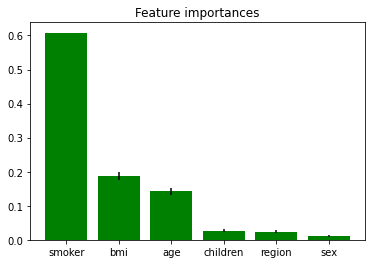

In [107]:
print('Feature importance ranking\n\n')
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="g", yerr=std[indices], align="center")
plt.show()

In [108]:
print('Predicting on new data\n\n')

Praveen = ['male', 'yes', 'southeast', 25, 30.5, 2]
print('Praveen - ',str(Praveen))

Praveen[0] = le_sex.fit_transform([Praveen[0]])[0] 
Praveen[1] = le_smoker.fit_transform([Praveen[1]])[0] 
Praveen[2] = le_region.fit_transform([Praveen[2]])[0] 

X = sc.transform([billy])

cost_for_Praveen = regressor.predict(X)[0]
print('Cost for Praveen = ',cost_for_Praveen,'\n\n')


Rajii = ['female','no','southeast',45,19,0]
print('Rajii - ',str(Rajii))

Rajii[0] = le_sex.fit_transform([Rajii[0]])[0] 
Rajii[1] = le_smoker.fit_transform([Rajii[1]])[0] 
Rajii[2] = le_region.fit_transform([Rajii[2]])[0] 

X = sc.transform([Rajii])

cost_for_Rajii = regressor.predict(X)[0]

print('Cost for Rajii = ',cost_for_Rajii)


Predicting on new data


Praveen -  ['male', 'yes', 'southeast', 25, 30.5, 2]
Cost for Praveen =  8972.276748050013 


Rajii -  ['female', 'no', 'southeast', 45, 19, 0]
Cost for Rajii =  12272.276505349997
